##**DATA UNDERSTANDING**

## **Konteks**

Database Northwind berisi data sales dari perusahaan fiktif bernama "Northwind Traders" yang berperan sebagai perusahaan impor/ekspor makanan di seluruh dunia. Database ini merupakan ERP bisnis kecil dengan table customers, orders, inventory, purchasing, supplier, shipping, employee dan akuntansi pintu tunggal.

## **Database Information**

Sumber Database: https://drive.google.com/drive/folders/1fTHrwh_gcLsOFKXHnUzUGEu_APxLoD9i

Database yang dimiliki mempunyai 13 tabel, yaitu:


*   Categories : menyimpan informasi tentang kategori barang yang dijual
*   Customercustomerdemo : data kosong. Tidak menyimpan informasi apa-apa.
*   Customerdemographics : data kosong. Tidak menyimpan informasi apa-apa.
*   Customers : menyimpan informasi tentang data pelanggan/customer
*   Employees : menyimpan informasi tentang data pegawai
*   Employeeterritories: menyimpan informasi soal karyawan dan wilayah kerjanya
*   Orderdetails: menyimpan detail dari pesanan yang dipesan pelanggan
*   Orders : menyimpan informasi jual beli yang dilakukan oleh pelanggan
*   Products: menyimpan informasi tentang produk makanan yang dijual
*   Region: menyimpan data region
*   Shippers: menyimpan data perusahaan yang melakukan jasa pengiriman 
*   Suppliers: menyimpan data supplier di seluruh dunia yang beraffiliasi dengan perusahaan
*   Territories: menyimpan data detail mengenai territory dan regionnya





##Content


1.   Database 
    * Connecting to Database
    * Data Detail dan Keuntungan Transaksi Tiap Supplier
    * Data Supplier dan Revenue

2.   Data Manipulation
    * Check Anomalies
    * Melihat Data Sekilas dari General Info
    * Missing Value
    * Format Data
    * Processing Date
    * Anomali pada Data ```RestUnits```
    * General info on Cleaned Data
    * Outlier
3. Data Visualization
4. Statistics



## **DATABASE**

## Connecting to Database

Bagian ini merupakan awal untuk analisa data. Pertama adalah membuat koneksi ke database. Database yang digunakan adalah ```Northwind``` . Dengan melakukan koneksi ini, kita dapat melihat seluruh data yang ada di tabel database.



In [ ]:
#Import Libraries

import pandas as pd
import numpy as np
import mysql.connector as sql

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Connect To Database

mydb = sql.connect(
    host = 'localhost',
    user = 'root',
    passwd = 'root',
    database = 'northwind'
)

Selain melakukan koneksi, hal lain yang perlu dilakukan adalah membuat fungsi untuk melakukan query ke database kemudian mengekspornya ke dalam bentuk pandas Dataframe. Tujuannya adalah supaya hasil ```query``` dapat disimpan dan digunakan untuk menganalisis data. Nantinya terdapat dua ```query``` untuk mengambil data di database dari berbagai tabel.

In [ ]:
# Query Function

curs = mydb.cursor()

def make_sql (query) :
    curs.execute (query)
    result = curs.fetchall()
    tabel = pd.DataFrame(result, columns=curs.column_names)
    return tabel

## Data Detail dan Keuntungan Transaksi Tiap Supplier

Data ini merupakan data utama yang akan dianalisa lebih lanjut. Data ini merupakan gabungan dari 5 tabel yakni, ```supplier, products, orderdetails, orders``` dan ```categories```. Masing-masing diambil beberapa kolom yang penting. Informasi yang diambil antara lain:


*   SupplierID dari tabel suppliers
* CompanyName dari tabel suppliers
* ContactName dari tabel suppliers
* Region dari tabel suppliers
*Country dari tabel suppliers
* ProductID dari tabel products
* CategoryID dari tabel products
* CategoryName dari tabel categories
* ProductName dari tabel products
* UnitPrice dari tabel products
* UnitsinStock dari tabel products
* UnitsOnOrder dari tabel products
* Discontinued dari tabel products
* OrderID dari tabel orderdetails
* Discount dari tabel orderdetails
* OrderDate dari tabel orders
* ShippedDate dari tabel orders
* ShipCountry dari tabel orders
* ShipVia dari tabel orders

Selain dari tabel, juga digenerate kolom baru bernama RestUnits dari selisih Stok dan Unit yang diorder. Adapun Revenue didapatkan dari harga tiap unit dikali jumlah kuantitas yang dipesan. Disini dibulatkan dua angka dibelakang koma.

Semua informasi kemudian diubah dalam bentuk pandas Dataframe untuk kemudian dilakukan analisis.



In [ ]:
table = make_sql(
    """
    select s.SupplierID, s.CompanyName, s.ContactName, s.Region, 
    s.Country, p.ProductID, p.CategoryID, c.CategoryName,p.ProductName, p.UnitPrice, p.UnitsInStock, p.UnitsOnOrder,
    (p.UnitsInStock- p.UnitsOnOrder) RestUnits,round((p.UnitPrice*od.Quantity),2) "Revenue", p.Discontinued, od.OrderID, od.Discount,
    o.OrderDate, o.ShippedDate, o.ShipCountry,o.ShipVia
    from suppliers s
    LEFT JOIN products p on s.SupplierID = p.SupplierID
    LEFT JOIN orderdetails od on od.ProductID = p.ProductID 
    LEFT JOIN orders o on o.OrderID = od.OrderID
    LEFT JOIN categories c on p.CategoryID = c.CategoryID
    """
)

In [ ]:
table.head()

,SupplierID,CompanyName,ContactName,Region,Country,ProductID,CategoryID,CategoryName,ProductName,UnitPrice,...,UnitsOnOrder,RestUnits,Revenue,Discontinued,OrderID,Discount,OrderDate,ShippedDate,ShipCountry,ShipVia
0,1,Exotic Liquids,Charlotte Cooper,None,UK,1,1,Beverages,Chai,18.0000,...,0,39,810.00,0,10285,0.0,1996-08-20,1996-08-26,Germany,2
1,1,Exotic Liquids,Charlotte Cooper,None,UK,1,1,Beverages,Chai,18.0000,...,0,39,324.00,0,10294,0.0,1996-08-30,1996-09-05,USA,2
2,1,Exotic Liquids,Charlotte Cooper,None,UK,1,1,Beverages,Chai,18.0000,...,0,39,360.00,0,10317,0.0,1996-09-30,1996-10-10,USA,1
3,1,Exotic Liquids,Charlotte Cooper,None,UK,1,1,Beverages,Chai,18.0000,...,0,39,270.00,0,10348,0.0,1996-11-07,1996-11-15,Germany,2
4,1,Exotic Liquids,Charlotte Cooper,None,UK,1,1,Beverages,Chai,18.0000,...,0,39,216.00,0,10354,0.0,1996-11-14,1996-11-20,Mexico,3


## Data Supplier dan Revenue

Berikut ini merupakan data yang dapat dijadikan informasi mengenai jumlah produk tiap supplier serta revenue yang didapat. Data ini memuat nama perusahaan Supplier, kategori produk yang dimiliki, kuantitas produk yang dimiliki, harga tiap unit, kuantitas yang dipesan, dan penghasilan yang didapat dari mengalikan harga tiap unit dengan kuantitas yang dipesan.

In [ ]:
categories_table = make_sql(
    """
    SELECT s.CompanyName as "Supplier Name",c.CategoryName as Category,
    count(p.ProductName) "Total Product",
    p.UnitPrice,
    od.Quantity,
    round((p.UnitPrice*od.Quantity),2) "Revenue"
    FROM  products p
    LEFT JOIN orderdetails od on od.ProductID = p.ProductID 
    LEFT JOIN suppliers s on s.SupplierID = p.SupplierID
    LEFT JOIN categories c on p.CategoryID = c.CategoryID
     group by s.CompanyName 
    """
)
categories_table

,Supplier Name,Category,Total Product,UnitPrice,Quantity,Revenue
0,Exotic Liquids,Beverages,94,18.0000,45,810.00
1,New Orleans Cajun Delights,Condiments,70,22.0000,20,440.00
2,Grandma Kelly's Homestead,Condiments,54,25.0000,30,750.00
3,Tokyo Traders,Meat/Poultry,51,97.0000,20,1940.00
4,Cooperativa de Quesos 'Las Cabras',Dairy Products,52,21.0000,12,252.00
5,Mayumi's,Seafood,68,6.0000,10,60.00
6,"Pavlova, Ltd.",Confections,163,17.4500,35,610.75
7,"Specialty Biscuits, Ltd.",Confections,126,9.2000,1,9.20
8,PB Knckebrd AB,Grains/Cereals,34,21.0000,6,126.00
9,Refrescos Americanas LTDA,Beverages,51,4.5000,15,67.50


## Data Order dengan Kategori

In [ ]:
df3 = make_sql('''
    SELECT o.orderID, p.ProductName, od.Discount, od.Quantity, cat.CategoryName, 
            cust.City, cust.Country
    FROM orders as o
    JOIN Customers as cust
        ON o.CustomerID = cust.CustomerID
    JOIN orderdetails as od
        ON o.orderID =  od.orderId
    JOIN products as p
        ON od.ProductId = p.productID
    JOIN categories as cat
        ON p.CategoryId = cat.CategoryID;
 ''')

In [ ]:
df3

,orderID,ProductName,Discount,Quantity,CategoryName,City,Country
0,10285,Chai,0.0,45,Beverages,Cunewalde,Germany
1,10294,Chai,0.0,18,Beverages,Albuquerque,USA
2,10317,Chai,0.0,20,Beverages,Portland,USA
3,10348,Chai,0.0,15,Beverages,Stuttgart,Germany
4,10354,Chai,0.0,12,Beverages,Mxico D.F.,Mexico
...,...,...,...,...,...,...,...
2150,10693,Rd Kaviar,0.0,15,Seafood,Seattle,USA
2151,10703,Rd Kaviar,0.0,35,Seafood,Brcke,Sweden
2152,10751,Rd Kaviar,0.0,15,Seafood,Genve,Switzerland
2153,10881,Rd Kaviar,0.0,10,Seafood,Buenos Aires,Argentina


## **Data Manipulation**

Data yang akan digunakan untuk analisis adalah data ```table```. Sebelum melakukan analisa lebih lanjut, hal yang harus dilakukan adalah mengecek informasi serta anomali pada data, seperti: missing values, outlier, data formatting, dan/atau data duplikat. Jika memang terdapat 'data kotor', maka perlu dilakukan data cleansing. Sehingga output yang didapatkan adalah dataset yang bersih yang dapat dianalisis lebih lanjut, dilakukan visualisasi, dan analisa statistiknya. 

# Check Anomalies

In [ ]:
#Check info Table
table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2155 entries, 0 to 2154
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   SupplierID    2155 non-null   int64         
 1   CompanyName   2155 non-null   object        
 2   ContactName   2155 non-null   object        
 3   Region        731 non-null    object        
 4   Country       2155 non-null   object        
 5   ProductID     2155 non-null   int64         
 6   CategoryID    2155 non-null   int64         
 7   CategoryName  2155 non-null   object        
 8   ProductName   2155 non-null   object        
 9   UnitPrice     2155 non-null   object        
 10  UnitsInStock  2155 non-null   int64         
 11  UnitsOnOrder  2155 non-null   int64         
 12  RestUnits     2155 non-null   int64         
 13  Revenue       2155 non-null   object        
 14  Discontinued  2155 non-null   int64         
 15  OrderID       2155 non-null   int64   

In [ ]:
# Dimension of the data
table.shape

(2155, 21)

In [ ]:
# Get the list of numeric and categorical columns according to the input
# Col datatype selection
input_datatype_selection = 'auto' 
if input_datatype_selection == "auto":

    binary_columns = [col for col in table.columns if table[col].nunique() == 2]
    print("Binary Columns : ", binary_columns)

    categorical_columns = [col for col in table.columns if table[col].dtype == "object"]
    print("Categorical Columns : ", categorical_columns)

    categorical_columns = binary_columns + categorical_columns
    categorical_columns = list(set(categorical_columns))

    numerical_columns = [col for col in table.columns if col not in categorical_columns]
    print("Numerical Columns : ", numerical_columns)
    
else:
    categorical_columns = input_cat_columns
    print("Categorical Columns : ", categorical_columns)
    
    numerical_columns   = input_num_columns
    print("Numerical Columns : ", numerical_columns)

Binary Columns :  ['Discontinued']
Categorical Columns :  ['CompanyName', 'ContactName', 'Region', 'Country', 'CategoryName', 'ProductName', 'UnitPrice', 'Revenue', 'ShipCountry']
Numerical Columns :  ['SupplierID', 'ProductID', 'CategoryID', 'UnitsInStock', 'UnitsOnOrder', 'RestUnits', 'OrderID', 'Discount', 'OrderDate', 'ShippedDate', 'ShipVia']


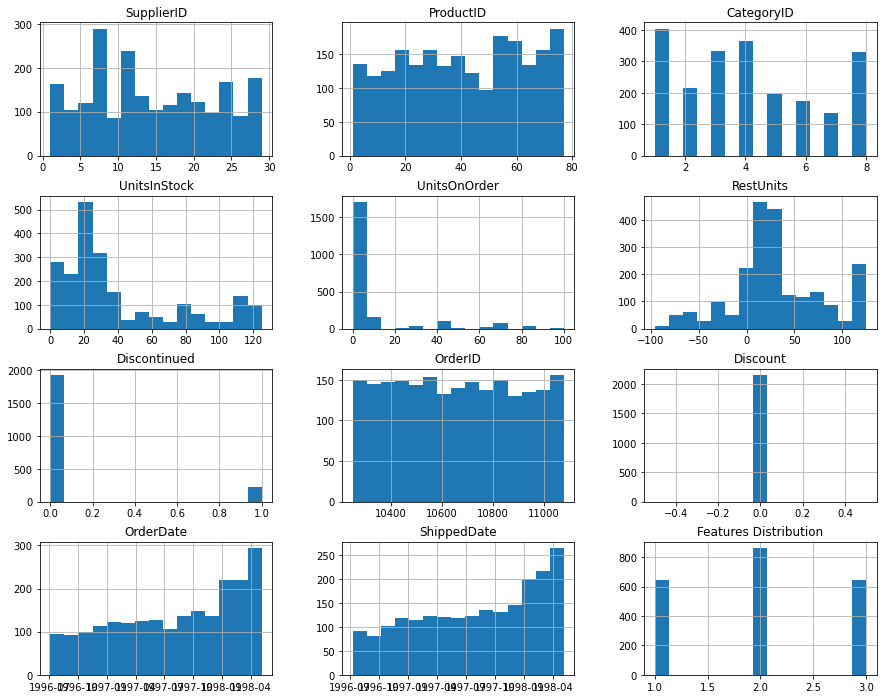

In [ ]:
# Check the distribution of all the features
table.hist(figsize=(15,12),bins = 15)
plt.title("Features Distribution")
plt.show()

## **Melihat Data Sekilas dari General Info**

Dari general info di atas, dapat diketahui bahwa terdapat 2155 baris dan 21 kolom. Setiap kolomnya memiliki tipe data yang berbeda-beda. Ada yang berupa object, float, integer, dan juga datetime. Setelah ditelisik lebih dalam lagi, terdapat tiga jenis kolom, yakni: Binary Columns, Categorical Columns, dan Numerical Columns.
Dari Tabel Distribusi Feature, ```orderID``` dan ```ProductID``` memiliki distribusi data yang uniform. ```UnitsInStock``` memiliki distribusi data *right skewed.* Sedangkan ```Discontinued``` karena memiliki data boolean maka angkanya hanya ada pada kisaran 1 dan 0. ```Discount``` berada di angka 0, ini berarti seluruh isi data ```Discount``` bernilai 0. **Kesimpulannya setiap kolom memiliki distribusi data yang berbeda-beda**

# **Missing Value**

Dari tabel dibawah ini, diketahui beberapa kolom memiliki **missing value**. Misalnya ```region``` yang memiliki  >50% data null dan ```Shipped Date``` yang memiliki 73 data null. Oleh karena itu, **missing value perlu ditangani. ** Data ```region``` yang memiliki 66% data null tentu tidak akan berguna karena memiliki separuh lebih data kosong.  Untuk mengatasi hal tersebut, data tersebut akan dihapus. 

Selain itu, data ```Shipped Date``` memiliki 3% data kosong dan tidak akan berpengaruh secara signifikan terhadap data utama. Sehingga data ini akan dihapus. 

Di sisi lain diketahui bahwa variable ```discount``` hanya memiliki satu values di isi datanya, yakni 0. Sehingga karena informasi ini tidak bermanfaat secara signifikan sehingga juga akan dihapus datanya dari data utama.

Dari tabel distribusi data diketahui variabel ```discontinued``` hany memiliki kurang dari 100 data yang memiliki nilai selain 1. Artinya data ini tidak akan berpengaruh secara signifikan terhadap data utama. Sehingga data ini akan dihapus. 

In [ ]:
#Code ini digunakan untuk menghitung nilai null disetiap kolom. Diketahui bahwa variabel region dan shipped date memiliki nilai kosong atau null values.
table.isnull().sum()

SupplierID         0
CompanyName        0
ContactName        0
Region          1424
Country            0
ProductID          0
CategoryID         0
CategoryName       0
ProductName        0
UnitPrice          0
UnitsInStock       0
UnitsOnOrder       0
RestUnits          0
Revenue            0
Discontinued       0
OrderID            0
Discount           0
OrderDate          0
ShippedDate       73
ShipCountry        0
ShipVia            0
dtype: int64

In [ ]:
table['Discount'].head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Discount, dtype: float64

In [ ]:
#Dari code berikut diketahui bahwa isi data tabel Discount tidak memiliki nilai lain selain 0.0. 
#Sehingga informasi dari kolom ini tidak bermanfaat secara signifikan

table[~(table['Discount'].isin(['0.0']))].shape

(2155, 21)

In [ ]:
#Dari 5 data teratas kolom discontinued ternyata hanya berisi nilai 0.
table['Discontinued'].head()

0    0
1    0
2    0
3    0
4    0
Name: Discontinued, dtype: int64

In [ ]:
#Code ini digunakan untuk menghapus kolom region, discount, dan discontinued.
table.drop(['Region', 'Discount','Discontinued'], axis=1, inplace = True)

In [ ]:
#Kolom ini digunakan untuk melakukan penghapusan baris yang memiliki nilai null diantara barisnya.
table.dropna(inplace = True)

Akhirnya setelah melakukan data cleansing *missing value*  melalui penghapusan baris yang mengandung nilai null, akan dihitung kembali jumlah nilai null disetiap kolom. Melalui code dibawah berikut, sudah tidak ada lagi data null, data kosong, serta data yang tidak bernilai signifikan yang terkandung dalam data utama.

In [ ]:
table.isnull().sum()

SupplierID      0
CompanyName     0
ContactName     0
Country         0
ProductID       0
CategoryID      0
CategoryName    0
ProductName     0
UnitPrice       0
UnitsInStock    0
UnitsOnOrder    0
RestUnits       0
Revenue         0
OrderID         0
OrderDate       0
ShippedDate     0
ShipCountry     0
ShipVia         0
dtype: int64

## **Format Data**
Kolom ```UnitPrice``` dan ```Revenue``` memiliki tipe data object. Hal ini tentu berbeda dengan isi data yang bernilai numerik. Oleh karena itu akan dilakukan **pengubahan tipe data** menjadi nilai numerik. Tujuannya agar kolom ini dapat dipergunakan untuk analisis sebagaimana mestinya. 

In [ ]:
#pd.to_numeric diaplikasikan untuk mengubah tipe data variabel dari object menjadi numerik.
table['UnitPrice'] = pd.to_numeric(table['UnitPrice'])
table['Revenue'] = pd.to_numeric(table['Revenue'])

In [ ]:
table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2082 entries, 0 to 2154
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   SupplierID    2082 non-null   int64         
 1   CompanyName   2082 non-null   object        
 2   ContactName   2082 non-null   object        
 3   Country       2082 non-null   object        
 4   ProductID     2082 non-null   int64         
 5   CategoryID    2082 non-null   int64         
 6   CategoryName  2082 non-null   object        
 7   ProductName   2082 non-null   object        
 8   UnitPrice     2082 non-null   float64       
 9   UnitsInStock  2082 non-null   int64         
 10  UnitsOnOrder  2082 non-null   int64         
 11  RestUnits     2082 non-null   int64         
 12  Revenue       2082 non-null   float64       
 13  OrderID       2082 non-null   int64         
 14  OrderDate     2082 non-null   datetime64[ns]
 15  ShippedDate   2082 non-null   datetime

## **Duplicated Data**

Pada bagian berikut, akan dicek apakah terdapat data duplikat dalam tabel. Untuk saat ini, diketahui bahwa tidak terdapat data duplikat dalam data utama.Dengan begitu, tidak diperlukan tindakan tambahan.

In [ ]:
table[table.duplicated()]

,SupplierID,CompanyName,ContactName,Country,ProductID,CategoryID,CategoryName,ProductName,UnitPrice,UnitsInStock,UnitsOnOrder,RestUnits,Revenue,OrderID,OrderDate,ShippedDate,ShipCountry,ShipVia


## Processing Date

Data awal menunjukkan terdapat dua data bertipe datetime, yakni ```shippedDate``` dan ```OrderDate```. Oleh karena itu, akan dilakukan ekstraksi informasi tambahan yakni ```ProcessingDate```. ```ShippedDate``` secara ringkas adalah tanggal barang dikirimkan, ```OrderdDate``` adalah tanggal barang dipesan, sedangkan ```ProcessingDate``` adalah tanggal barang diproses dari pemesanan hingga pengiriman. Output yang keluar berupa selisih dalam hari. 

Berdasarkan output, diketahui bahwa barang kebanyakan diproses selama 7 hari. 1 hari adalah waktu pemrosesan tercepat dan 37 hari adalah waktu pemrosesan terlama. Sejauh ini,tidak ada anomali data dalam kolom ```ProcessingDate```.

In [ ]:
table['ProcessingDate'] = table['ShippedDate'] - table['OrderDate']

In [ ]:
table['ProcessingDate'].value_counts()

7 days     271
6 days     241
3 days     187
9 days     184
5 days     177
4 days     176
8 days     174
2 days     149
10 days    129
12 days     45
1 days      43
11 days     34
19 days     23
21 days     20
29 days     19
18 days     19
13 days     17
23 days     15
32 days     15
15 days     14
20 days     13
34 days     13
25 days     13
14 days     12
35 days     12
17 days     11
30 days     11
22 days     11
24 days     11
28 days      8
26 days      5
27 days      4
31 days      3
37 days      2
16 days      1
Name: ProcessingDate, dtype: int64

### Anomali pada Unique Value 'RestUnits'

Terdapat kolom baru yang digenerate dari kolom ```UnitsInStock``` dan ```UnitsOnOrder```, yakni ```RestUnits```. Secara ringkas ```UnitsInStock``` adalah total unit yang berada di stok gudang, ```UnitsOnOrder``` adalah total unit yang dipesan, dan ```RestUnits``` adalah sisa stok digudang setelah dipesan. Namun demikian, terdapat nilai minus dalam perhitungan *unique valuenya*. Ada -96, -39, dan -55. Asumsinya, terdapat jumlah order yang melebihi stok gudang sehingga terdapat nilai minus dalam data. 

In [ ]:
#Menghitung total unique value dari kolom RestUnits
table['RestUnits'].value_counts()

 26     132
 20     122
 0      107
 17      72
 112     61
       ... 
 65       9
 49       9
-96       7
-39       6
-55       6
Name: RestUnits, Length: 61, dtype: int64

In [ ]:
#Terdapat 6 data yang memiliki nilai RestUnits -55
table[table['RestUnits'] == -55]

,SupplierID,CompanyName,ContactName,Country,ProductID,CategoryID,CategoryName,ProductName,UnitPrice,UnitsInStock,UnitsOnOrder,RestUnits,Revenue,OrderID,OrderDate,ShippedDate,ShipCountry,ShipVia,ProcessingDate
1644,22,Zaanse Snoepfabriek,Dirk Luchte,Netherlands,48,3,Confections,Chocolade,12.75,15,70,-55,892.50,10403,1997-01-03,1997-01-09,Austria,3,6 days
1645,22,Zaanse Snoepfabriek,Dirk Luchte,Netherlands,48,3,Confections,Chocolade,12.75,15,70,-55,191.25,10453,1997-02-21,1997-02-26,UK,2,5 days
1646,22,Zaanse Snoepfabriek,Dirk Luchte,Netherlands,48,3,Confections,Chocolade,12.75,15,70,-55,191.25,10507,1997-04-15,1997-04-22,Mexico,1,7 days
1647,22,Zaanse Snoepfabriek,Dirk Luchte,Netherlands,48,3,Confections,Chocolade,12.75,15,70,-55,76.50,10604,1997-07-18,1997-07-29,Portugal,1,11 days
1648,22,Zaanse Snoepfabriek,Dirk Luchte,Netherlands,48,3,Confections,Chocolade,12.75,15,70,-55,306.00,10704,1997-10-14,1997-11-07,Brazil,1,24 days
1649,22,Zaanse Snoepfabriek,Dirk Luchte,Netherlands,48,3,Confections,Chocolade,12.75,15,70,-55,102.00,10814,1998-01-05,1998-01-14,France,3,9 days


In [ ]:
##Terdapat 7 data yang memiliki nilai RestUnits -96
table[table['RestUnits'] == -96]

,SupplierID,CompanyName,ContactName,Country,ProductID,CategoryID,CategoryName,ProductName,UnitPrice,UnitsInStock,UnitsOnOrder,RestUnits,Revenue,OrderID,OrderDate,ShippedDate,ShipCountry,ShipVia,ProcessingDate
156,2,New Orleans Cajun Delights,Shelley Burke,USA,66,2,Condiments,Louisiana Hot Spiced Okra,17.0,4,100,-96,510.0,10300,1996-09-09,1996-09-18,Italy,2,9 days
157,2,New Orleans Cajun Delights,Shelley Burke,USA,66,2,Condiments,Louisiana Hot Spiced Okra,17.0,4,100,-96,1020.0,10442,1997-02-11,1997-02-18,Austria,2,7 days
158,2,New Orleans Cajun Delights,Shelley Burke,USA,66,2,Condiments,Louisiana Hot Spiced Okra,17.0,4,100,-96,1020.0,10475,1997-03-14,1997-04-04,Belgium,1,21 days
159,2,New Orleans Cajun Delights,Shelley Burke,USA,66,2,Condiments,Louisiana Hot Spiced Okra,17.0,4,100,-96,170.0,10493,1997-04-02,1997-04-10,France,3,8 days
160,2,New Orleans Cajun Delights,Shelley Burke,USA,66,2,Condiments,Louisiana Hot Spiced Okra,17.0,4,100,-96,408.0,10532,1997-05-09,1997-05-12,UK,3,3 days
161,2,New Orleans Cajun Delights,Shelley Burke,USA,66,2,Condiments,Louisiana Hot Spiced Okra,17.0,4,100,-96,68.0,10682,1997-09-25,1997-10-01,Mexico,2,6 days
162,2,New Orleans Cajun Delights,Shelley Burke,USA,66,2,Condiments,Louisiana Hot Spiced Okra,17.0,4,100,-96,850.0,10774,1997-12-11,1997-12-12,Sweden,1,1 days


In [ ]:
#Terdapat 6 data yang memiliki nilai RestUnits -39
table[table['RestUnits'] == -39]

,SupplierID,CompanyName,ContactName,Country,ProductID,CategoryID,CategoryName,ProductName,UnitPrice,UnitsInStock,UnitsOnOrder,RestUnits,Revenue,OrderID,OrderDate,ShippedDate,ShipCountry,ShipVia,ProcessingDate
1338,17,Svensk Sjfda AB,Michael Bjrn,Sweden,37,8,Seafood,Gravad lax,26.0,11,50,-39,26.0,10259,1996-07-18,1996-07-25,Mexico,3,7 days
1339,17,Svensk Sjfda AB,Michael Bjrn,Sweden,37,8,Seafood,Gravad lax,26.0,11,50,-39,728.0,10337,1996-10-24,1996-10-29,Germany,3,5 days
1340,17,Svensk Sjfda AB,Michael Bjrn,Sweden,37,8,Seafood,Gravad lax,26.0,11,50,-39,260.0,10408,1997-01-08,1997-01-14,France,1,6 days
1341,17,Svensk Sjfda AB,Michael Bjrn,Sweden,37,8,Seafood,Gravad lax,26.0,11,50,-39,468.0,10523,1997-05-01,1997-05-30,UK,2,29 days
1342,17,Svensk Sjfda AB,Michael Bjrn,Sweden,37,8,Seafood,Gravad lax,26.0,11,50,-39,1560.0,10847,1998-01-22,1998-02-10,USA,3,19 days
1343,17,Svensk Sjfda AB,Michael Bjrn,Sweden,37,8,Seafood,Gravad lax,26.0,11,50,-39,208.0,10966,1998-03-20,1998-04-08,Switzerland,1,19 days


## **General Info on Cleaned Data**

Secara umum, missing value sudah tidak ada. Kolom ```UnitPrice``` dan ```Revenue``` telah memiliki tipe data float64 atau numerik sesuai dengan format data yang seharusnya. Kolom ```ProcessingDate``` memiliki tipedata timedelta. Menurut https://docs.python.org/3/library/datetime.html, timedelta berarti durasi antara dua waktu. Hal ini tentu sesuai karena kolom ini digenerate dari selisih ```ShippedDate``` dan ```OrderDate```. Data akhir menunjukkan terdapat 2082 baris data dan 18 kolom.

In [ ]:
listItem = []
for col in table.columns :
    listItem.append([col, table[col].dtype, len(table),table[col].isna().sum(), round((table[col].isna().sum()/len(table[col])) * 100,2),
                    table[col].nunique(), list(table[col].drop_duplicates().sample(2).values)])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Data Type', 'Data Count', 'Missing Value', 
    'Missing Value Percentage', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Data Type,Data Count,Missing Value,Missing Value Percentage,Number of Unique,Unique Sample
0,SupplierID,int64,2082,0,0.0,29,"[7, 28]"
1,CompanyName,object,2082,0,0.0,29,"[Cooperativa de Quesos 'Las Cabras', Heli Swar..."
2,ContactName,object,2082,0,0.0,29,"[Peter Wilson, Shelley Burke]"
3,Country,object,2082,0,0.0,17,"[Finland, Spain]"
4,ProductID,int64,2082,0,0.0,77,"[51, 7]"
5,CategoryID,int64,2082,0,0.0,8,"[8, 1]"
6,CategoryName,object,2082,0,0.0,8,"[Confections, Beverages]"
7,ProductName,object,2082,0,0.0,77,"[Konbu, Lakkalikri]"
8,UnitPrice,float64,2082,0,0.0,62,"[39.0, 43.9]"
9,UnitsInStock,int64,2082,0,0.0,51,"[38, 31]"


In [ ]:
table.describe()

,SupplierID,ProductID,CategoryID,UnitPrice,UnitsInStock,UnitsOnOrder,RestUnits,Revenue,OrderID,ShipVia,ProcessingDate
count,2082.000000,2082.000000,2082.000000,2082.000000,2082.000000,2082.000000,2082.000000,2082.000000,2082.000000,2082.000000,2082
mean,14.548511,41.007205,4.136407,28.170331,39.762728,7.949087,31.813641,682.960399,10645.182517,1.999039,8 days 08:17:17.463976945
std,8.216075,22.091232,2.374911,32.034842,36.062315,19.569399,46.364671,1121.103980,233.122319,0.781206,6 days 16:37:41.880301151
min,1.000000,1.000000,1.000000,2.500000,0.000000,0.000000,-96.000000,6.000000,10248.000000,1.000000,1 days 00:00:00
25%,7.000000,22.250000,2.000000,12.500000,17.000000,0.000000,10.000000,180.000000,10444.000000,1.000000,4 days 00:00:00
50%,14.000000,41.000000,4.000000,19.450000,25.000000,0.000000,25.000000,385.700000,10643.000000,2.000000,7 days 00:00:00
75%,21.000000,60.000000,6.000000,34.000000,57.000000,0.000000,57.000000,772.600000,10844.750000,3.000000,9 days 00:00:00
max,29.000000,77.000000,8.000000,263.500000,125.000000,100.000000,125.000000,15810.000000,11069.000000,3.000000,37 days 00:00:00


## **Outlier**

Pada bagian ini, kita akan menganalisis data ```Revenue```. Apakah terdapat data *outlier* dalam kolom ```Revenue```. Secara ringkas, Q3 adalah 772 dollar, dan Q1 adalah 180 dollar. Setelah dilakukan perhitungan dengan nilai outlier > Q3+(1.5 x IQR) atau outlier < Q1 - (1.5 x IQR), diketahui bahwa terdapat 161 baris data yang merupakan outlier. Untuk saat ini tidak dilakukan tindakan apapun, karena nilai outlier masih bermanfaat untuk visualisasi di tahap selanjutnya. 

In [ ]:
table['Revenue'].describe()

count     2082.000000
mean       682.960399
std       1121.103980
min          6.000000
25%        180.000000
50%        385.700000
75%        772.600000
max      15810.000000
Name: Revenue, dtype: float64

In [ ]:
Q1_amount = table['Revenue'].describe()['25%']
Q3_amount = table['Revenue'].describe()['75%']
iqr = Q3_amount - Q1_amount

outlier_index = table[(table['Revenue'] < Q1_amount - (1.5 * iqr)) | (table['Revenue']> Q3_amount + (1.5 * iqr)) ].index
not_outlier_index = table[(table['Revenue'] > Q1_amount - (1.5 * iqr)) & (table['Revenue']< Q3_amount + (1.5 * iqr)) ].index
table.loc[outlier_index]

,SupplierID,CompanyName,ContactName,Country,ProductID,CategoryID,CategoryName,ProductName,UnitPrice,UnitsInStock,UnitsOnOrder,RestUnits,Revenue,OrderID,OrderDate,ShippedDate,ShipCountry,ShipVia,ProcessingDate
75,1,Exotic Liquids,Charlotte Cooper,UK,2,1,Beverages,Chang,19.00,17,40,-23,1900.0,11030,1998-04-17,1998-04-27,USA,2,10 days
148,2,New Orleans Cajun Delights,Shelley Burke,USA,65,2,Condiments,Louisiana Fiery Hot Pepper Sauce,21.05,76,0,76,1684.0,10765,1997-12-04,1997-12-09,Germany,3,5 days
166,3,Grandma Kelly's Homestead,Regina Murphy,USA,6,2,Condiments,Grandma's Boysenberry Spread,25.00,120,0,120,1750.0,10618,1997-08-01,1997-08-08,Canada,1,7 days
185,3,Grandma Kelly's Homestead,Regina Murphy,USA,7,7,Produce,Uncle Bob's Organic Dried Pears,30.00,15,0,15,2700.0,10694,1997-10-06,1997-10-09,Germany,3,3 days
197,3,Grandma Kelly's Homestead,Regina Murphy,USA,7,7,Produce,Uncle Bob's Organic Dried Pears,30.00,15,0,15,1800.0,10987,1998-03-31,1998-04-06,UK,1,6 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2132,29,Forts d'rables,Chantal Goulet,Canada,62,3,Confections,Tarte au sucre,49.30,17,0,17,2366.4,10691,1997-10-03,1997-10-22,Germany,2,19 days
2143,29,Forts d'rables,Chantal Goulet,Canada,62,3,Confections,Tarte au sucre,49.30,17,0,17,2465.0,10852,1998-01-26,1998-01-30,USA,1,4 days
2147,29,Forts d'rables,Chantal Goulet,Canada,62,3,Confections,Tarte au sucre,49.30,17,0,17,1725.5,10904,1998-02-24,1998-02-27,USA,3,3 days
2150,29,Forts d'rables,Chantal Goulet,Canada,62,3,Confections,Tarte au sucre,49.30,17,0,17,2958.0,10949,1998-03-13,1998-03-17,Canada,3,4 days


##  **Data Visualization**

Setelah mendapatkan data yang sudah bersih dan siap digunakan. Langkah selanjutnya adalah memvisualisasi data untuk didapatken business insightnya sehingga dapat memberikan gambaran kepada Northwind Traders mengenai produk yang dijualnya di berbagai negara. Dari insight tersebut, akan dijelaskan strategi-strategi yang dapat meningkatkan revenue atau pendapatan.

## Proporsi Pengiriman Via Jalur 1,2 dan 3

Terlihat pada grafik ini, 39% kontainer dikirimkan via jalur 2. 30,55% kontainer dikirimkan via jalur 1. Serta 30,45% dikirimkan via jalur 2. Permasalahannya tidak dijelaskan apakah jalur 1,2, dan 3 merupakan jalur darat, laut, dan udara sehingga sulit untuk menjelaskan mana jalur yang terbaik untuk pengiriman. 
Proporsi pengiriman secara rata-rata seimbang. Namun demikian, kontainer banyak dikirimkan via jalur kedua

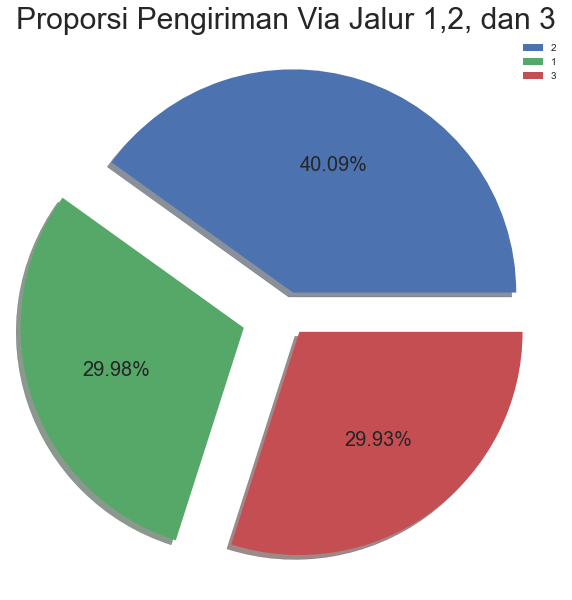

In [ ]:
# Pie Chart Status

plt.style.use('seaborn')
plt.figure(figsize=(10,15))
plt.pie(table['ShipVia'].value_counts().values,  autopct='%.2f%%',
     explode= (0.1,0.2,0.1),textprops={'fontsize': 20}, shadow=True)
plt.title ('Proporsi Pengiriman Via Jalur 1,2, dan 3', size = 30)
plt.legend(table['ShipVia'].unique())
plt.show()

##Supplier Country with Its Revenue

Pada grafik berikut, diplotkan negara supplier dengan pendapatannya (Revenue). Terlihat bahwa negara Prancis memiliki warna yang lebih gelap dibandingkan yang lain. Sehingga dapat disimpulkan bahwa pendapatan Supplier dari negara Prancis sangat tinggi, yakni 321.408 dollar. Sementara itu, negara lain juga memiliki warna orange moderat berarti pendapatannya rata-rata. 
Grafik ini digambarkan melalui Tableau karena kemampuannya dalam membuat grafik peta secara mudah dan tepat.

In [ ]:
from IPython.display import Image
Image(url= "https://i.imgur.com/C9cWjJI.png")

## Treemap Supplier Revenue

Pada grafik berikut masih sama. Yakni pendapatan masing-masing supplier. Grafik digambarkan dalam bentuk treemap karena dapat memberikan persepsi yang cepat mengenai item yang berkontribusi secara besar masing-masing kategori [1]. Dalam hal ini item adalah perusahaan supplier dan kategori adalah revenue. Berdasarkan grafik berikut, Perusahaan Aux joyeux ecclsiastiques memiliki warna yang lebih pekat dan gambar kotak yang paling besar dibandingkan yang lain. Dapat disimpulkan bahwa perusahaan tersebut memiliki revenue yang tinggi.

Strategi untuk menghasilkan revenue yang tinggi perlu dibagi ke masing-masing supplier rekanan sehingga perusahaan Northwest Trader sebagai perusahaan induk dapat menjual bahan makanan lebih banyak lagi. 

Grafik digambarkan menggunakan Tableau karena dapat membuat grafik Treemap secara cepat dan mudah (drag and drop)

[1] https://www.nngroup.com/articles/treemaps/

In [ ]:
Image(url= "https://i.imgur.com/wTuL1Ff.png")

## Total Revenue by Category

Setelah sebelumnya berfokus pada negara dan perusahaan supplier, sekarang kita akan beralih ke pendapatan tiap kategori produk. Secara umum, produk beverages, dairy products, dan meat/poultry berkontribusi secara besar terhadap total pendapatan.
Melihat hal tersebut, produce dan grain/cereal menempati posisi terbawah. Strategi yang diperlukan adalah:
 

1.    Meningkatkan kapasitas produksi beverages, dan dairy products supaya memenuhi demand
2.   Menganalisis faktor-faktor lain mengapa grain cereals berada di urutan terbawah.


Grafik digambarkan menggunakan Tableau karena lebih cepat dan lebih efisien dalam membuat grafik.



In [ ]:
Image(url= "https://i.imgur.com/XiJJpRZ.png")

## Supplier dan Kategori dengan Revenue Tertinggi

Pada grafik berikut tampak bahwa perusahaan Aux Joyeux mampu menjadi supplier yang unggul meski hanya mengandalkan penjualan Beverages. Sedangkan perusahaan supplier Plutzer menempati posisi kedua setelah mensupply produk produce, meat/poultry, grain/cereals, condiments, dan beverages. Sementara itu gai pturage menempati posisi ketiga dengan dairy productmnya. Dapat disimpulkan bahwa komposisi produk yang dipasarkan tidak berpengaruh pada tingkat pendapatan. Suatu perusahaan dapat unggul meski hanya mensupply produk satu kategori saja, sedangkan ada perusahaan yang memiliki banyak kategori supply namun tidak unggul. 

Strategi untuk kasus ini yakni melakukan pemetaan produksi dari Northwest dan kategori yang laku di pasaran. Grafik menggunakan Tableau karena dapat membuat stacked bar chart dengan mudah dan efisien.

In [ ]:
Image(url= "https://i.imgur.com/XSOINEO.png")

## Number of Order by Country

Setelah sebelumnya kita mengetahui supplier dan kategori dengan revenue tertinggi, saatnya menganalisis grafik jumlah pesanan berdasarkan negara.
Dari peta diketahui semakin tua warnanya, semakin banyak pesanannya. Sebaliknya, semakin muda warnanya semakin sedikit pesanannya. 

 Berdasarkan grafik peta dan barplot di bawah ini, diketahui negara Jerman lebih banyak memesan produk dari Northwest Traders dengan total sebanyak 2810 pesanan. Namun demikian, USA di nomor kedua juga tidak kalah memesan dengan pesanan lebih dari 2600 item. Austria berada di nomor ketiga dengan pesanan lebih banyak dari 1600. 
 Mengetahui hal berikut strategi yang bisa diambil adalah:
 1.  Membuat pusat produksi dan mencari supplier baru di tiga negara dengan pemesan produk terbanyak.
 2. Membuat kantor cabang distributor disetiap negara (di bawah supplier) yang bertindak cepat mengirimkan barang karena banyak produk dari perusahaan merupakan bahan makanan. 

In [ ]:
Image(url= "https://i.imgur.com/4vBanYC.png")

Bar chart berikut hanya sebagai pelengkap dari grafik map di atas.

In [ ]:
Image(url= "https://i.imgur.com/1rTpzmT.png")

## Units in Stock vs Units in Order

Terdapat lineplot yang dinamis pada unit in stock dibandingkan unit in order tiap bulan. Pada bulan Maret dan April stok tertinggi pada 10000 stok. Sedangkan order juga mengalami pesanan tertinggi dengan 2000 pesanan. Kemudian pada bulan Juni, stok dan order menurun sangat tajam hingga 3500 stok dan 700 orderan. Baru kemudian stok berangsur-angsur memulih hingga 6000 stok. Sedangkan order mengalami peningkatan hingga ke angka 2000. Order tertinggi tepat berada di awal tahun yakni bulan Januari. Melihat hal ini strategi yang perlu dijalankan adalah


1.   Meningkatkan stok di Quartal pertama untuk memenuhi permintaan pesanan.
2.   Mengurangi jumlah stok di Quartal kedua karena pesanan juga akan turun.
3.   Menjaga stabilitas stok di Quartal ketiga.



In [ ]:
Image(url= "https://i.imgur.com/zDoh09E.png")

## Perbandingan Unit in Stock vs. Unit in Order Tiap Tahun

Unit in Stock dan Unit in Order tertinggi terjadi di tahun 1997 dan terendah di tahun 1996. Kemudian turun kembali di tahun 1998. Dapat dikatakan tahun 1997 merupakan tahun keemasan bagi perusahaan karena stock dan order meningkat dengan pesat. Oleh karena itu, perlu dipelajari strategi apa  yang membuat tahun 1997 mengalami stock dan order dengan sangat tinggi. Grafik dibuat dengan Tableau untuk mendapatkan hasil yang cepat, mudah dan efisien.

In [ ]:
Image(url= "https://i.imgur.com/hMqqy0V.png")

## Boxplot Kategori Pesanan

Berdasarkan boxplot berikut, data memiliki persebaran yang relatif sama dengan outlier di beberapa bagian.

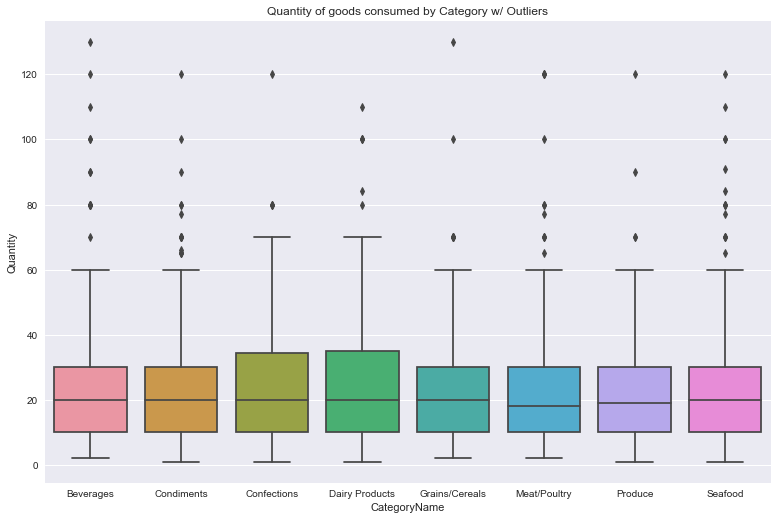

orderID                                                        \
                 count          mean         std      min       25%      50%   
CategoryName                                                                   
Beverages        404.0  10673.623762  247.990919  10253.0  10464.75  10685.0   
Condiments       216.0  10664.375000  247.244899  10250.0  10461.75  10656.5   
Confections      334.0  10651.035928  236.321418  10252.0  10441.75  10656.5   
Dairy Products   366.0  10640.639344  243.522182  10248.0  10420.00  10619.0   
Grains/Cereals   196.0  10663.974490  227.571740  10248.0  10468.50  10663.5   
Meat/Poultry     173.0  10633.988439  239.229383  10254.0  10425.00  10624.0   
Produce          136.0  10665.448529  250.944876  10249.0  10456.50  10646.0   
Seafood          330.0  10675.957576  236.711471  10250.0  10482.50  10685.0   

                                  Discount       ...           Quantity  \
                     75%      max    count mean  ...  75%  max    count   
CategoryName                                     ...                      
Beverages       10885.00  11077.0    404.0  0.0  ...  0.0  0.0    404.0   
Condiments      10881.00  11077.0    216.0  0.0  ...  0.0  0.0    216.0   
Confections     10854.25  11077.0    334.0  0.0  ...  0.0  0.0    334.0   
Dairy Products  10835.75  11077.0    366.0  0.0  ...  0.0  0.0    366.0   
Grains/Cereals  10845.00  11077.0    196.0  0.0  ...  0.0  0.0    196.0   
Meat/Poultry    10834.00  11077.0    173.0  0.0  ...  0.0  0.0    173.0   
Produce         10908.25  11077.0    136.0  0.0  ...  0.0  0.0    136.0   
Seafood         10878.50  11077.0    330.0  0.0  ...  0.0  0.0    330.0   

                                                                     
                     mean        std  min   25%   50%    75%    max  
CategoryName                                                         
Beverages       23.594059  19.222830  2.0  10.0  20.0  30.00  130.0  
Condiments      24.527778  19.761818  1.0  10.0  20.0  30.00  120.0  
Confections     23.670659  17.264570  1.0  10.0  20.0  34.25  120.0  
Dairy Products  24.997268  18.797770  1.0  10.0  20.0  35.00  110.0  
Grains/Cereals  23.275510  18.253924  2.0  10.0  20.0  30.00  130.0  
Meat/Poultry    24.271676  22.238955  2.0  10.0  18.0  30.00  120.0  
Produce         21.985294  18.490031  1.0  10.0  19.0  30.00  120.0  
Seafood         23.275758  19.161917  1.0  10.0  20.0  30.00  120.0  

[8 rows x 24 columns]

In [ ]:
plt.figure(figsize=(13,8.5))

sns.boxplot(x='CategoryName', y='Quantity', data=df3)
plt.title('Quantity of goods consumed by Category w/ Outliers')
plt.show()

df3.groupby(['CategoryName']).describe()

Setelah outlier dihilangkan, Confections dan Dairy Product memiliki persebaran yang lebih lebar dibandingkan dengan data yang lain. 

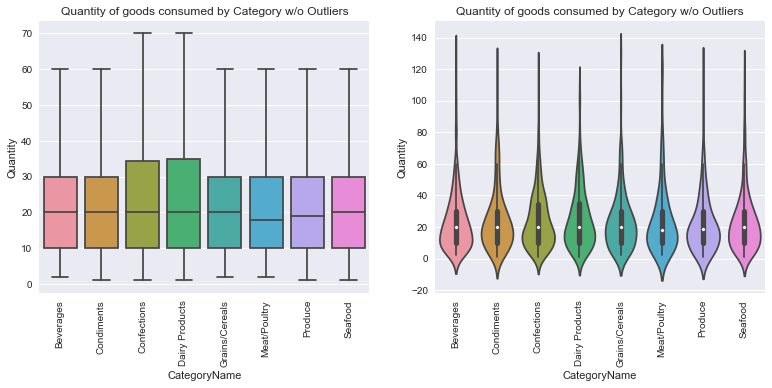

In [ ]:
ig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, figsize=(13,5))

sns.boxplot(x='CategoryName', y='Quantity', data=df3, ax=ax1, showfliers=False)
ax1.set_title('Quantity of goods consumed by Category w/o Outliers')
ax1.tick_params(axis='x', labelrotation=90)

sns.violinplot(x='CategoryName', y='Quantity', data=df3, ax=ax2, showfliers=False)
ax2.set_title('Quantity of goods consumed by Category w/o Outliers')
ax2.tick_params(axis='x', labelrotation=90)

plt.show()

Terlihat bahwa kuantitas Rightly Skewed atau skewed positive.

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Quantity', ylabel='Density'>

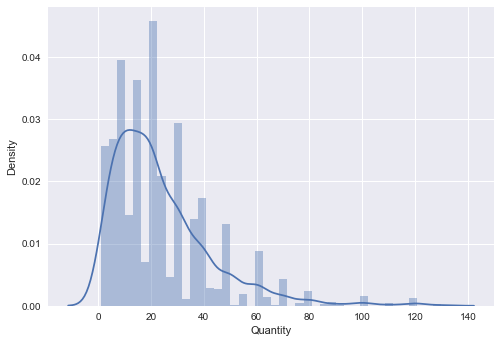

In [ ]:
sns.distplot(a=df3.Quantity)

## **Statistik**

## 1) Perbedaan Revenue tiap Jenis Produk

Pertanyaan 1: Apakah kategori makanan memiliki dampak signifikan pada Revenue?

H0: Terdapat Perbedaan Nilai Median Revenue pada Setiap Product Yang Ada

Ha: Tidak Terdapat Perbedaan Nilai Median Revenue pada Setiap Product Yang Ada

In [ ]:
# Uji Perbandingan Nilai profitEach Antar Setiap Product Line (Normalitas)

from scipy.stats import shapiro

norm, pval = shapiro(table['Revenue'])

if pval < 0.05 :
    print (f'Tolak H0 Karena P-Value ({pval} < 5%)')
    print ('DATA TIDAK BERDISTRIBUSI NORMAL')
else :
    print (f'Gagal Tolak H0 Karena P-Value ({pval} > 5%)')
    print ('DATA BERDISTRIBUSI NORMAL')

Tolak H0 Karena P-Value (0.0 < 5%)
DATA TIDAK BERDISTRIBUSI NORMAL


Dari hasil uji statistik Saphiro, diketahui data tidak terdistribusi secara normal. Sehingga akan diaplikasikan uji non parametrik Kruskal Wilis

In [ ]:
table['CategoryName'].unique()

array(['Beverages', 'Condiments', 'Produce', 'Meat/Poultry', 'Seafood',
       'Dairy Products', 'Confections', 'Grains/Cereals'], dtype=object)

In [ ]:

from scipy.stats import kruskal

krus, pvalkrus = kruskal(
    table[table['CategoryName'] == 'Beverages']['Revenue'],
    table[table['CategoryName'] == 'Condiments']['Revenue'],
    table[table['CategoryName'] == 'Produce']['Revenue'],
    table[table['CategoryName'] == 'Meat/Poultry']['Revenue'],
    table[table['CategoryName'] == 'Seafood']['Revenue'],
    table[table['CategoryName'] == 'Dairy Products']['Revenue'],
    table[table['CategoryName'] == 'Confections']['Revenue'],
    table[table['CategoryName'] == 'Grains/Cereals']['Revenue']
    
) 

if pvalkrus < 0.05 :
    print (f'Tolak H0 Karena P-Value ({pval} < 5%)')
    print ('Terdapat Perbedaan Nilai Median Revenue pada Setiap Product Yang Ada')
else :
    print (f'Gagal Tolak H0 Karena P-Value ({pval} > 5%)')
    print ('Tidak Terdapat Perbedaan Nilai Median Revenue pada Setiap Product Yang Ada')

Tolak H0 Karena P-Value (0.0 < 5%)
Terdapat Perbedaan Nilai Median Revenue pada Setiap Product Yang Ada


KESIMPULAN

Karena data tolak H0 artinya hipotesis Ha diterima. **Tidak ada perbedaan nilai Median Revenue pada Setiap Produk yang Ada**

## 2) Kategori dan Jumlah Pesanan

Pertanyaan 2: Apakah kategori makanan memiliki dampak signifikan pada kuantitas pesanan?

H0: Kategori makanan memiliki memiliki dampak yang signifikan pada kuantitas yang dipesan

Ha: Tidak ada perbedaan signifikan antara kuantitas pesanan berdasarkan Kategori


In [ ]:
#import necessary library
import custom_tools as ct
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [ ]:
#Tes kenormalan dengan uji Shapiro

print('Total Category goods quantity:')
ct.normality_test_shapiro(df3.Quantity)
print('\n')

categories = df3.CategoryName.unique()
for cat in categories:
    print(cat)
    ct.normality_test_shapiro(df3[df3.CategoryName==cat].Quantity)
    print('\n')

Total Category goods quantity:
p = 5.022954345372307e-41
Therefore the data is NOT normal


Beverages
p = 1.9424622547858795e-20
Therefore the data is NOT normal


Condiments
p = 6.648943684040357e-14
Therefore the data is NOT normal


Confections
p = 3.1780212006926253e-14
Therefore the data is NOT normal


Dairy Products
p = 1.792136004416414e-15
Therefore the data is NOT normal


Grains/Cereals
p = 3.3445877903152954e-13
Therefore the data is NOT normal


Meat/Poultry
p = 1.4861369242429728e-14
Therefore the data is NOT normal


Produce
p = 3.441083182287308e-11
Therefore the data is NOT normal


Seafood
p = 4.892618640476611e-18
Therefore the data is NOT normal




C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level functi

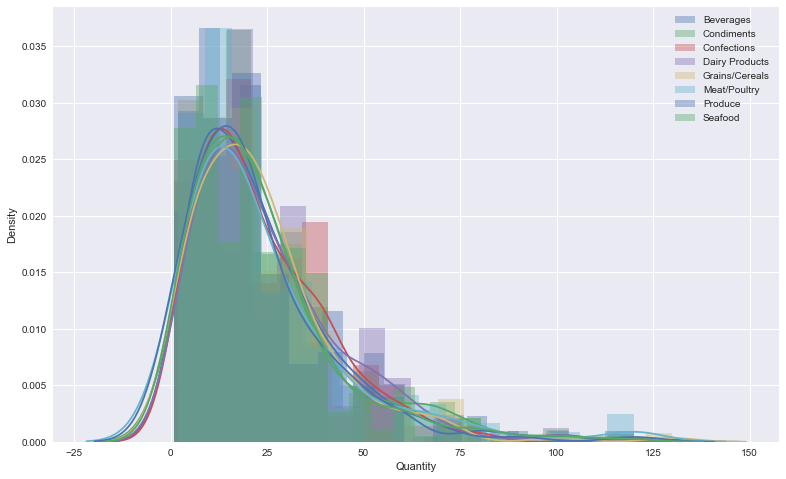

In [ ]:
plt.figure(figsize=(13,8))

categories = df3.CategoryName.unique()
for cat in categories:
    sns.distplot(a=df3[df3.CategoryName==cat].Quantity, label=cat)
    plt.legend()
plt.show()

Diketahui pada gambar di atas, bahwa data Skewed Right. Oleh karena itu akan dicoba random sampling terhadap data kategorikal

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level functi

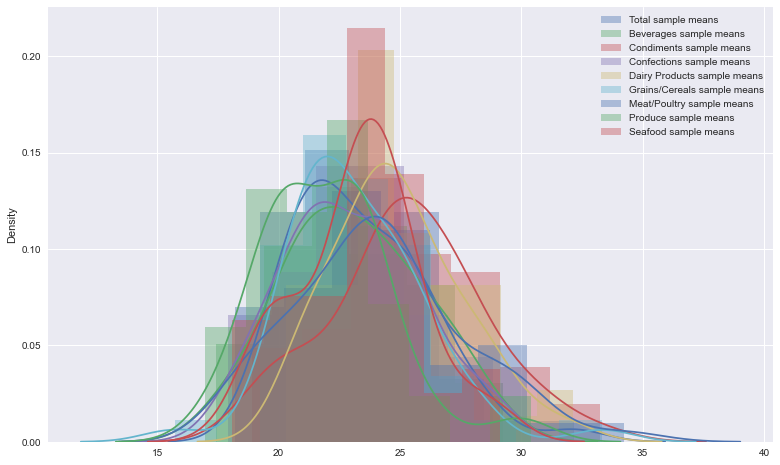

In [ ]:
plt.figure(figsize=(13,8))

n = sample_size = 50 #set the number of samples equal to the size of each sample to simplify arguments passed in
dict_samp_means = {}
categories = df3.CategoryName.unique()

sample_a = ct.bootstrap_sampling(n=n, pop=df3.Quantity, samp_size=sample_size, replace=True)
sns.distplot(a=sample_a, label='Total sample means')

dict_samp_means['pop_samp_means'] = sample_a
for cat in categories:

    sample_b = ct.bootstrap_sampling(n=n, pop=df3[df3.CategoryName==cat].Quantity, samp_size=sample_size, replace=True)
    dict_samp_means[cat.replace(" ", "_").replace('/','_')] = sample_b
    
    sns.distplot(a=sample_b, label=f'{cat} sample means')
    
plt.legend()
plt.show()

Dari random sampling, terlihat bahwa data terdistribusi normal. Oleh karena itu akan diuji lagi hipotesisnya menggunakan Uji ANOVA.

In [ ]:
df_samp_means = pd.DataFrame.from_dict(dict_samp_means)

In [ ]:
alpha = 0.05

# ANOVA Test on region
formula = f'pop_samp_means ~ Dairy_Products + Meat_Poultry + Grains_Cereals + Beverages + Confections + Produce + Seafood + Condiments'
lm = ols(formula, dict_samp_means).fit()
anova = sm.stats.anova_lm(lm, typ=2)
anova['reject_null'] = anova['PR(>F)'] < alpha
df_table = pd.DataFrame(anova)

df_table

,sum_sq,df,F,PR(>F),reject_null
Dairy_Products,21.062244,1.0,3.932351,0.054092,False
Meat_Poultry,33.364071,1.0,6.229119,0.016682,True
Grains_Cereals,4.020399,1.0,0.750614,0.391324,False
Beverages,7.522321,1.0,1.404428,0.242807,False
Confections,49.359907,1.0,9.215565,0.004157,True
Produce,1.135215,1.0,0.211946,0.647679,False
Seafood,11.060079,1.0,2.064933,0.158310,False
Condiments,14.357300,1.0,2.680528,0.109236,False
Residual,219.601975,41.0,NaN,NaN,False


KESIMPULAN

Berdasarkan uji ANOVA, tidak terdapat dampak yang signifikan antara kategori makanan dengan kuantitas pesanan terjual. Berdasarkan informasi ini, kita gagal menolak H0 sehingga Ha diterima. **Tidak ada perbedaan statistik signifikan antara kategori dengan kuantitas pesanan satu sama lain**